In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import interpolate

In [2]:
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size']=12

In [3]:
pwd = os.getcwd()
print(pwd)

f:\research\NbN_MS_project\comments_on_draft1\computations\spline


In [4]:
df = pd.read_excel(pwd + '/spline_data/Pressure_vs_Tc.xlsx')
df.head()

,pressures,Tc_Al2O3,Tc_GaAs,Tc_HfO2,Tc_LiNbO3,Tc_MgF2,Tc_MgO,Tc_Si,Tc_SiN
0,0.010,13.829793,13.47658,13.47658,15.328725,15.463983,15.521904,15.155607,10.694582
1,0.015,13.829793,13.47658,13.47658,15.328725,15.463983,15.521904,15.155607,10.694582
2,0.020,13.829793,13.47658,13.47658,15.328725,15.463983,15.521904,15.155607,10.694582
3,0.025,13.829793,13.47658,13.47658,15.328725,15.463983,15.521904,15.155607,10.694582
4,0.030,13.829793,13.47658,13.47658,15.328725,15.463983,15.521904,15.155607,10.694582


In [5]:
df_pressure = pd.read_excel(pwd + '/spline_data/Pressure_vs_Tc.xlsx')
df_pressure.head()

,pressures,Tc_Al2O3,Tc_GaAs,Tc_HfO2,Tc_LiNbO3,Tc_MgF2,Tc_MgO,Tc_Si,Tc_SiN
0,0.010,13.829793,13.47658,13.47658,15.328725,15.463983,15.521904,15.155607,10.694582
1,0.015,13.829793,13.47658,13.47658,15.328725,15.463983,15.521904,15.155607,10.694582
2,0.020,13.829793,13.47658,13.47658,15.328725,15.463983,15.521904,15.155607,10.694582
3,0.025,13.829793,13.47658,13.47658,15.328725,15.463983,15.521904,15.155607,10.694582
4,0.030,13.829793,13.47658,13.47658,15.328725,15.463983,15.521904,15.155607,10.694582


In [6]:
def spline(knots, x, y):
    x_new = np.linspace(0, 1, knots+2)[1:-1]
    q_knots = np.quantile(x, x_new)
    t, c, k = interpolate.splrep(x, y, t=q_knots, s=30)
    yfit = interpolate.BSpline(t,c, k)(x)
    return yfit

In [7]:
#Generate some nice colors
colors = ['#c3121e', '#0348a1', '#ffb01c', '#027608', '#0193b0', '#9c5300', '#949c01', '#7104b5']
#            0sangre,   1neptune,  2pumpkin,  3clover,   4denim,    5cocoa,    6cumin,    7berry
#Or try a color from seaborn

### Effect of pressure

In [8]:
x_pressure  = df_pressure.pressures

y1_pressure = df_pressure.Tc_Al2O3
y2_pressure = df_pressure.Tc_LiNbO3
y3_pressure = df_pressure.Tc_MgF2
y4_pressure = df_pressure.Tc_MgO
y5_pressure = df_pressure.Tc_Si

In [9]:
knots_pressure = 1

y_fit1_pressure = spline(knots_pressure, x_pressure, y1_pressure)
y_fit2_pressure = spline(knots_pressure, x_pressure, y2_pressure)
y_fit3_pressure = spline(knots_pressure, x_pressure, y3_pressure)
y_fit4_pressure = spline(knots_pressure, x_pressure, y4_pressure)
y_fit5_pressure = spline(knots_pressure, x_pressure, y5_pressure)

In [10]:
x_pressure = x_pressure[::40]

y_fit1_pressure = y_fit1_pressure[::40]
y_fit2_pressure = y_fit2_pressure[::40]
y_fit3_pressure = y_fit3_pressure[::40]
y_fit4_pressure = y_fit4_pressure[::40]
y_fit5_pressure = y_fit5_pressure[::40]

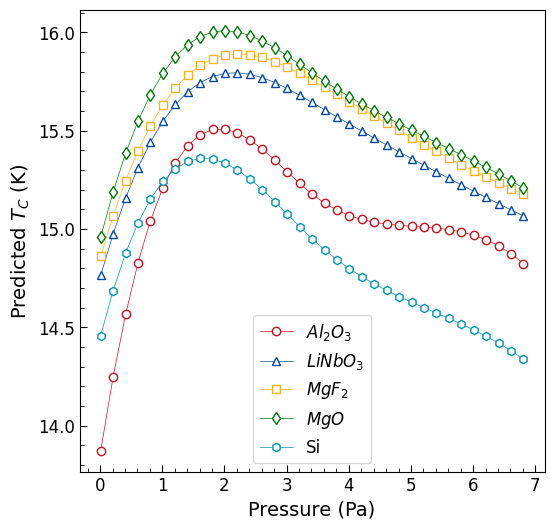

In [11]:
plt.figure(figsize=(6,6))

plt.plot(x_pressure, y_fit1_pressure, linestyle='-', lw=0.5, marker='o', label=r'$Al_2O_3$', color=colors[0], mfc='w', markersize=6)
plt.plot(x_pressure, y_fit2_pressure, linestyle='-', lw=0.5, marker='^', label=r'$LiNbO_3$', color=colors[1], mfc='w', markersize=6)
plt.plot(x_pressure, y_fit3_pressure, linestyle='-', lw=0.5, marker='s', label=r'$MgF_2$',   color=colors[2], mfc='w', markersize=6)
plt.plot(x_pressure, y_fit4_pressure, linestyle='-', lw=0.5, marker='d', label=r'$MgO$',     color=colors[3], mfc='w', markersize=6)
plt.plot(x_pressure, y_fit5_pressure, linestyle='-', lw=0.5, marker='h', label=r'Si',        color=colors[4], mfc='w', markersize=6)

#plot params
#plt.xlim([-1,8])
#plt.ylim([-0.5,16])
plt.minorticks_on()
plt.tick_params(direction='in', right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
#xticks = np.arange(0, 1e4,10)
#yticks = np.arange(0,16.1,4)

plt.tick_params(direction='in',which='minor', length=3, bottom=True, top=False, left=True, right=False)
plt.tick_params(direction='in',which='major', length=5, bottom=True, top=False, left=True, right=False)
#plt.xticks(xticks)
#plt.yticks(yticks)


#plt.text(1,325, f'y={Decimal(coefs[3]):.4f}x$^3$+{Decimal(coefs[2]):.2f}x$^2$+{Decimal(coefs[1]):.2f}x+{Decimal(coefs[0]):.1f}',fontsize =13)


plt.xlabel(r'Pressure (Pa)', fontsize=14) 
plt.ylabel(r'Predicted $T_C$ (K)',fontsize=14)  # label the y axis


plt.legend(fontsize=12)  # add the legend (will default to 'best' location)

#plt.savefig('data_for_exercises/plotting/generic_plot.png', dpi=300,bbox_inches="tight")
plt.show()

### Effect of temperature

In [12]:
df_temperature = pd.read_excel(pwd + '/spline_data/Temperature_vs_Tc.xlsx')
df_temperature.head()

,temperature,Tc_Al2O3,Tc_GaAs,Tc_HfO2,Tc_LiNbO3,Tc_MgF2,Tc_MgO,Tc_Si,Tc_SiN
0,5,15.248437,14.497744,14.497744,15.652145,15.759568,15.818659,15.231085,9.692213
1,10,15.248437,14.497744,14.497744,15.652145,15.759568,15.818659,15.231085,9.692213
2,15,15.248437,14.497744,14.497744,15.652145,15.759568,15.818659,15.231085,9.692213
3,20,15.248437,14.497744,14.497744,15.652145,15.759568,15.818659,15.231085,9.692213
4,25,15.248437,14.497744,14.497744,15.652145,15.759568,15.818659,15.231085,9.692213


In [13]:
x_temperature  = df_temperature.temperature

y1_temperature = df_temperature.Tc_Al2O3
y2_temperature = df_temperature.Tc_LiNbO3
y3_temperature = df_temperature.Tc_MgF2
y4_temperature = df_temperature.Tc_MgO
y5_temperature = df_temperature.Tc_Si

In [14]:
knots_temperature = 3

y_fit1_temperature = spline(knots_temperature, x_temperature, y1_temperature)
y_fit2_temperature = spline(knots_temperature, x_temperature, y2_temperature)
y_fit3_temperature = spline(knots_temperature, x_temperature, y3_temperature)
y_fit4_temperature = spline(knots_temperature, x_temperature, y4_temperature)
y_fit5_temperature = spline(knots_temperature, x_temperature, y5_temperature)

In [15]:
x_temperature = x_temperature[::10]

y_fit1_temperature = y_fit1_temperature[::10]
y_fit2_temperature = y_fit2_temperature[::10]
y_fit3_temperature = y_fit3_temperature[::10]
y_fit4_temperature = y_fit4_temperature[::10]
y_fit5_temperature = y_fit5_temperature[::10]

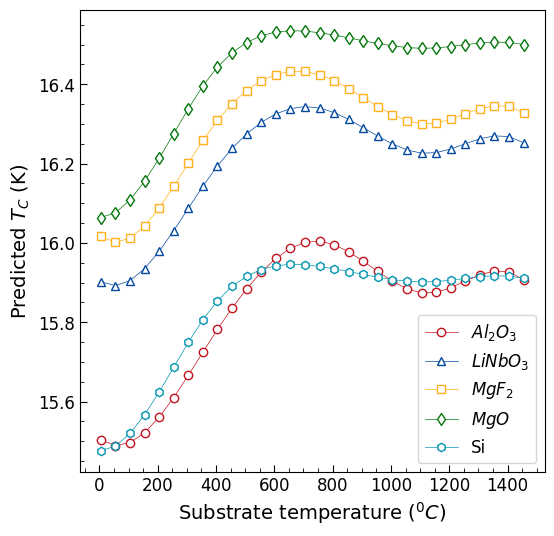

In [16]:
plt.figure(figsize=(6,6))

plt.plot(x_temperature, y_fit1_temperature, linestyle='-', lw=0.5, marker='o', label=r'$Al_2O_3$', color=colors[0], mfc='w', markersize=6)
plt.plot(x_temperature, y_fit2_temperature, linestyle='-', lw=0.5, marker='^', label=r'$LiNbO_3$', color=colors[1], mfc='w', markersize=6)
plt.plot(x_temperature, y_fit3_temperature, linestyle='-', lw=0.5, marker='s', label=r'$MgF_2$',   color=colors[2], mfc='w', markersize=6)
plt.plot(x_temperature, y_fit4_temperature, linestyle='-', lw=0.5, marker='d', label=r'$MgO$',     color=colors[3], mfc='w', markersize=6)
plt.plot(x_temperature, y_fit5_temperature, linestyle='-', lw=0.5, marker='h', label=r'Si',        color=colors[4], mfc='w', markersize=6)

#plot params
#plt.xlim([-1,8])
#plt.ylim([-0.5,16])
plt.minorticks_on()
plt.tick_params(direction='in', right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
#xticks = np.arange(0, 1e4,10)
#yticks = np.arange(0,16.1,4)

plt.tick_params(direction='in',which='minor', length=3, bottom=True, top=False, left=True, right=False)
plt.tick_params(direction='in',which='major', length=5, bottom=True, top=False, left=True, right=False)
#plt.xticks(xticks)
#plt.yticks(yticks)


#plt.text(1,325, f'y={Decimal(coefs[3]):.4f}x$^3$+{Decimal(coefs[2]):.2f}x$^2$+{Decimal(coefs[1]):.2f}x+{Decimal(coefs[0]):.1f}',fontsize =13)


plt.xlabel(r'Substrate temperature ($^0C$)', fontsize=14) 
plt.ylabel(r'Predicted $T_C$ (K)',fontsize=14)  # label the y axis


plt.legend(fontsize=12)  # add the legend (will default to 'best' location)

#plt.savefig('data_for_exercises/plotting/generic_plot.png', dpi=300,bbox_inches="tight")
plt.show()

### Effect of thickness

In [17]:
df_thickness = pd.read_excel(pwd + '/spline_data/Thickness_vs_Tc.xlsx')
df_thickness.head()

,thickness,Tc_Al2O3,Tc_GaAs,Tc_HfO2,Tc_LiNbO3,Tc_MgF2,Tc_MgO,Tc_Si,Tc_SiN
0,5,11.548329,11.312680,11.312680,12.455834,12.476019,12.588398,12.239541,10.243667
1,10,14.340483,13.507269,13.507269,13.987018,14.016552,14.101483,13.706873,9.450120
2,15,15.307517,14.401436,14.401436,14.897626,14.929236,15.014141,14.997744,10.153499
3,20,15.259421,14.514431,14.514431,15.521959,15.553509,15.638414,15.628821,10.416548
4,25,14.549279,13.743363,13.743364,14.568117,14.661192,14.746097,14.742742,9.870506


In [18]:
x_thickness  = df_thickness.thickness

y1_thickness = df_thickness.Tc_Al2O3
y2_thickness = df_thickness.Tc_LiNbO3
y3_thickness = df_thickness.Tc_MgF2
y4_thickness = df_thickness.Tc_MgO
y5_thickness = df_thickness.Tc_Si

In [19]:
knots_thickness = 1

y_fit1_thickness = spline(knots_thickness, x_thickness, y1_thickness)
y_fit2_thickness = spline(knots_thickness, x_thickness, y2_thickness)
y_fit3_thickness = spline(knots_thickness, x_thickness, y3_thickness)
y_fit4_thickness = spline(knots_thickness, x_thickness, y4_thickness)
y_fit5_thickness = spline(knots_thickness, x_thickness, y5_thickness)

In [20]:
x_thickness = x_thickness[::15]

y_fit1_thickness = y_fit1_thickness[::15]
y_fit2_thickness = y_fit2_thickness[::15]
y_fit3_thickness = y_fit3_thickness[::15]
y_fit4_thickness = y_fit4_thickness[::15]
y_fit5_thickness = y_fit5_thickness[::15]

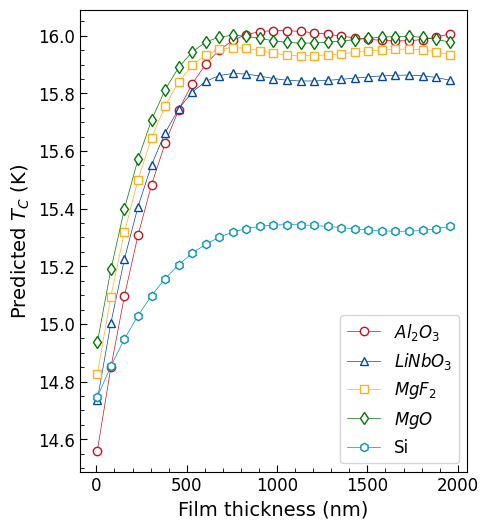

In [21]:
plt.figure(figsize=(5,6))

plt.plot(x_thickness, y_fit1_thickness, linestyle='-', lw=0.5, marker='o', label=r'$Al_2O_3$', color=colors[0], mfc='w', markersize=6)
plt.plot(x_thickness, y_fit2_thickness, linestyle='-', lw=0.5, marker='^', label=r'$LiNbO_3$', color=colors[1], mfc='w', markersize=6)
plt.plot(x_thickness, y_fit3_thickness, linestyle='-', lw=0.5, marker='s', label=r'$MgF_2$',   color=colors[2], mfc='w', markersize=6)
plt.plot(x_thickness, y_fit4_thickness, linestyle='-', lw=0.5, marker='d', label=r'$MgO$',     color=colors[3], mfc='w', markersize=6)
plt.plot(x_thickness, y_fit5_thickness, linestyle='-', lw=0.5, marker='h', label=r'Si',        color=colors[4], mfc='w', markersize=6)

#plot params
#plt.xlim([-1,8])
#plt.ylim([-0.5,16])
plt.minorticks_on()
plt.tick_params(direction='in', right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
#xticks = np.arange(0, 1e4,10)
#yticks = np.arange(0,16.1,4)

plt.tick_params(direction='in',which='minor', length=3, bottom=True, top=False, left=True, right=False)
plt.tick_params(direction='in',which='major', length=5, bottom=True, top=False, left=True, right=False)
#plt.xticks(xticks)
#plt.yticks(yticks)


#plt.text(1,325, f'y={Decimal(coefs[3]):.4f}x$^3$+{Decimal(coefs[2]):.2f}x$^2$+{Decimal(coefs[1]):.2f}x+{Decimal(coefs[0]):.1f}',fontsize =13)


plt.xlabel(r'Film thickness (nm)', fontsize=14) 
plt.ylabel(r'Predicted $T_C$ (K)',fontsize=14)  # label the y axis


plt.legend(fontsize=12)  # add the legend (will default to 'best' location)

#plt.savefig('data_for_exercises/plotting/generic_plot.png', dpi=300,bbox_inches="tight")
plt.show()

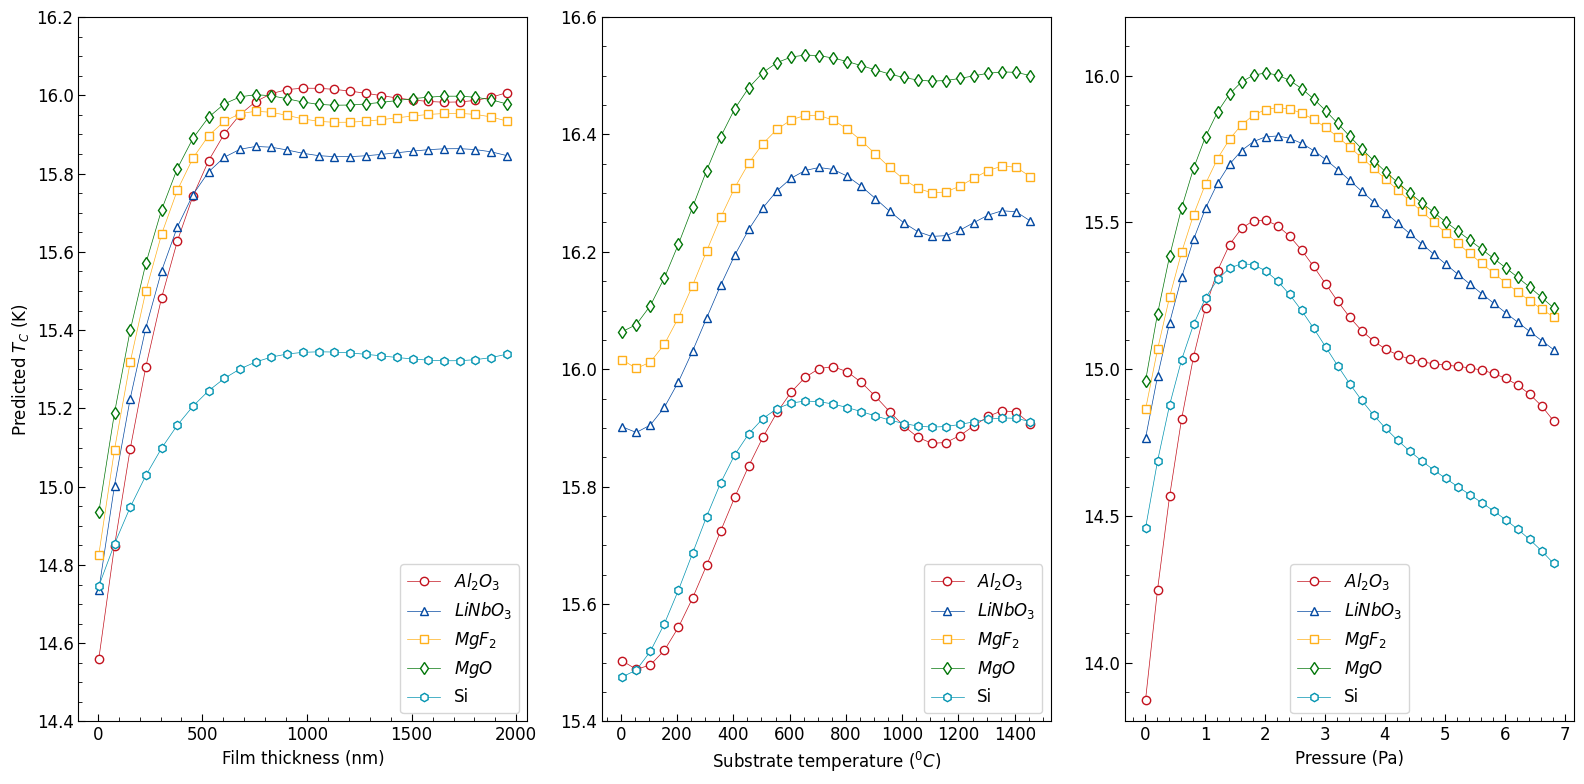

In [22]:
fig, ax = plt.subplots(1, 3, sharex=False, figsize=(16,8))

"""ax[0].set_title('Film thickness vs $T_{C}$', fontsize=12)
ax[1].set_title('Substrate temperature vs $T_{C}$', fontsize=12)
ax[2].set_title('Pressure vs $T_{C}$', fontsize=12)"""

ax[0].set_ylim(14.4, 16.2)
ax[1].set_ylim(15.4, 16.6)
ax[2].set_ylim(13.8, 16.2)


ax[0].plot(x_thickness, y_fit1_thickness, linestyle='-', lw=0.5, marker='o', label=r'$Al_2O_3$', color=colors[0], mfc='w', markersize=6)
ax[0].plot(x_thickness, y_fit2_thickness, linestyle='-', lw=0.5, marker='^', label=r'$LiNbO_3$', color=colors[1], mfc='w', markersize=6)
ax[0].plot(x_thickness, y_fit3_thickness, linestyle='-', lw=0.5, marker='s', label=r'$MgF_2$',   color=colors[2], mfc='w', markersize=6)
ax[0].plot(x_thickness, y_fit4_thickness, linestyle='-', lw=0.5, marker='d', label=r'$MgO$',     color=colors[3], mfc='w', markersize=6)
ax[0].plot(x_thickness, y_fit5_thickness, linestyle='-', lw=0.5, marker='h', label=r'Si',        color=colors[4], mfc='w', markersize=6)

ax[0].minorticks_on()
ax[0].tick_params(direction='in', right=True, top=True)
ax[0].tick_params(labelsize=12)
ax[0].tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
ax[0].tick_params(direction='in',which='minor', length=3, bottom=True, top=False, left=True, right=False)
ax[0].tick_params(direction='in',which='major', length=5, bottom=True, top=False, left=True, right=False)
ax[0].legend(fontsize=12)
#ax[0].text(-10, 16.6, 'a)', fontsize =16)


ax[1].plot(x_temperature, y_fit1_temperature, linestyle='-', lw=0.5, marker='o', label=r'$Al_2O_3$', color=colors[0], mfc='w', markersize=6)
ax[1].plot(x_temperature, y_fit2_temperature, linestyle='-', lw=0.5, marker='^', label=r'$LiNbO_3$', color=colors[1], mfc='w', markersize=6)
ax[1].plot(x_temperature, y_fit3_temperature, linestyle='-', lw=0.5, marker='s', label=r'$MgF_2$',   color=colors[2], mfc='w', markersize=6)
ax[1].plot(x_temperature, y_fit4_temperature, linestyle='-', lw=0.5, marker='d', label=r'$MgO$',     color=colors[3], mfc='w', markersize=6)
ax[1].plot(x_temperature, y_fit5_temperature, linestyle='-', lw=0.5, marker='h', label=r'Si',        color=colors[4], mfc='w', markersize=6)

ax[1].minorticks_on()
ax[1].tick_params(direction='in', right=True, top=True)
ax[1].tick_params(labelsize=12)
ax[1].tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
ax[1].tick_params(direction='in',which='minor', length=3, bottom=True, top=False, left=True, right=False)
ax[1].tick_params(direction='in',which='major', length=5, bottom=True, top=False, left=True, right=False)
ax[1].legend(fontsize=12)
#ax[1].text(-10, 16.3, 'b)', fontsize =16)


ax[2].plot(x_pressure, y_fit1_pressure, linestyle='-', lw=0.5, marker='o', label=r'$Al_2O_3$', color=colors[0], mfc='w', markersize=6)
ax[2].plot(x_pressure, y_fit2_pressure, linestyle='-', lw=0.5, marker='^', label=r'$LiNbO_3$', color=colors[1], mfc='w', markersize=6)
ax[2].plot(x_pressure, y_fit3_pressure, linestyle='-', lw=0.5, marker='s', label=r'$MgF_2$',   color=colors[2], mfc='w', markersize=6)
ax[2].plot(x_pressure, y_fit4_pressure, linestyle='-', lw=0.5, marker='d', label=r'$MgO$',     color=colors[3], mfc='w', markersize=6)
ax[2].plot(x_pressure, y_fit5_pressure, linestyle='-', lw=0.5, marker='h', label=r'Si',        color=colors[4], mfc='w', markersize=6)

ax[2].minorticks_on()
ax[2].tick_params(direction='in', right=True, top=True)
ax[2].tick_params(labelsize=12)
ax[2].tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
ax[2].tick_params(direction='in',which='minor', length=3, bottom=True, top=False, left=True, right=False)
ax[2].tick_params(direction='in',which='major', length=5, bottom=True, top=False, left=True, right=False)
ax[2].legend(fontsize=12, loc='lower center')


ax[0].set_xlabel('Film thickness (nm)')
ax[1].set_xlabel(r'Substrate temperature ($^0C$)')
ax[2].set_xlabel('Pressure (Pa)')

ax[0].set_ylabel('Predicted $T_{C}$ (K)')
#ax[1].set_ylabel('Predicted $T_{c}$ (K)')
#ax[2].set_ylabel('Predicted $T_{c}$ (K)')

#plt.legend()
plt.tight_layout()
#plt.savefig(pwd+'/Effect_of_attributes.png', dpi=1000)
plt.show()